In [1]:
import yaml
import numpy as np
from scipy.constants import codata
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt 


In [2]:
def fit(x, y, t):
    z = CubicSpline(x, y, bc_type='clamped')
    shift = z(t)
    plt.plot(t, shift)
    plt.show()
    return shift

def read_nist(File):
    data = np.genfromtxt(File, skip_header=2)
    return data

def calculate_gibbs(t, s, h):
    deltas = (s * 0.01036) / 1000
    deltah = h * 0.01036
    g = deltah - t * deltas
    return g

In [3]:
def fit_nist_1(nist_file):
    nist_data = read_nist(nist_file)
    h0 = nist_data[0, 4]
    fitted_s = fit(nist_data[:, 0], nist_data[:, 2], np.arange(1, 3000))
    fitted_h = fit(nist_data[:, 0], nist_data[:, 4], np.arange(1, 3000))
    fitted_h = fitted_h - fitted_h[0]
    gibbs = calculate_gibbs(np.arange(1, 3000), fitted_s, fitted_h)
    return gibbs

In [4]:
def fit_nist(file, incr, t_min, t_max):
    nist_data = read_nist(file)
    h0 = nist_data[0, 4]
    fitted_s_1 = fit(nist_data[:, 0], nist_data[:, 2], np.arange(t_min, t_max, incr))
    fitted_h_1 = fit(nist_data[:, 0], nist_data[:, 4], np.arange(t_min, t_max, incr))
    fitted_h_1 = fitted_h_1 - fitted_h_1[0]
    gibbs_1 = calculate_gibbs(np.arange(t_min, t_max, incr), fitted_s_1, fitted_h_1)
    return gibbs_1

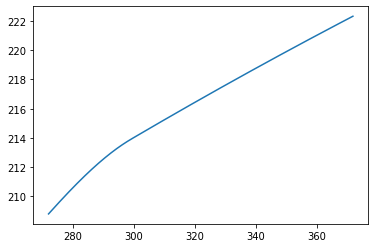

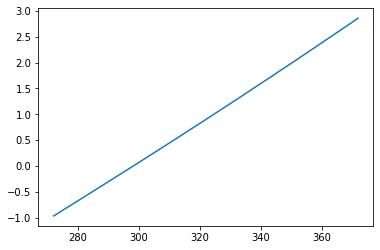

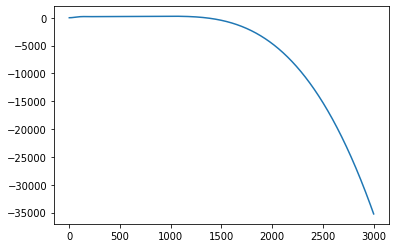

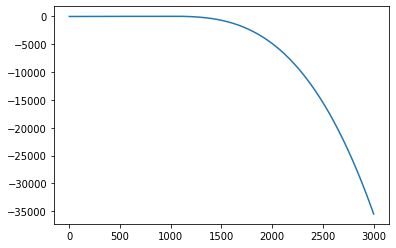

[-0.58837508 -0.58861896 -0.58886284 -0.58910672 -0.58935061 -0.58959449
 -0.58983837 -0.59008224 -0.59032612 -0.59056999 -0.59081386 -0.59105772
 -0.59130158 -0.59154544 -0.59178929 -0.59203313 -0.59227696 -0.59252079
 -0.59276461 -0.59300842 -0.59325222 -0.59349601 -0.59373979 -0.59398356
 -0.59422731 -0.59447106 -0.59471479 -0.59495851 -0.59520221 -0.5954459
 -0.59568957 -0.59593323 -0.59617687 -0.59642049 -0.5966641  -0.59690769
 -0.59715126 -0.59739481 -0.59763834 -0.59788185 -0.59812534 -0.5983688
 -0.59861225 -0.59885567 -0.59909906 -0.59934244 -0.59958578 -0.59982911
 -0.6000724  -0.60031567 -0.60055891 -0.60080213 -0.60104531 -0.60128847
 -0.6015316  -0.6017747  -0.60201776 -0.6022608  -0.6025038  -0.60274677
 -0.60298971 -0.60323261 -0.60347547 -0.60371831 -0.6039611  -0.60420386
 -0.60444659 -0.60468927 -0.60493192 -0.60517453 -0.6054171  -0.60565963
 -0.60590211 -0.60614456 -0.60638696 -0.60662932 -0.60687164 -0.60711392
 -0.60735615 -0.60759833 -0.60784047 -0.60808256 -0.6

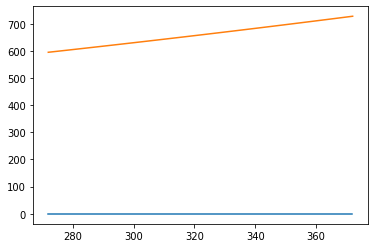

In [15]:
Y_1 = np.arange(273, 373, 0.1)
Y_1 = Y_1 -1
gibbs_1 = fit_nist("CO2.txt", 0.1, 272, 372)

Y_2 = np.arange(273, 374, 1)
Y_2 = Y_2 -1
gibbs_2 = fit_nist("CO2.txt", 1, 1, 3000)
print(gibbs_1)
print(gibbs_2)
plt.plot(Y_1, gibbs_1[-Y_1.size:])
plt.plot(Y_2, gibbs_2[-Y_2.size:])

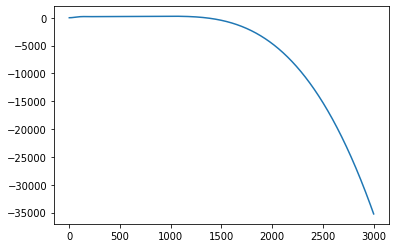

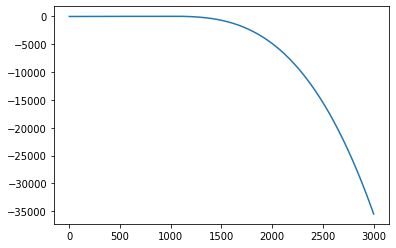

[-3.94957132e-07  1.23073458e-05  3.04901450e-05 ...  7.24490401e+02
  7.25915425e+02  7.27342534e+02]
[-0.50626778 -0.50870514 -0.5111409  -0.51357448 -0.51600527 -0.51843266
 -0.52085604 -0.52327476 -0.52568822 -0.52809575 -0.5304967  -0.53289043
 -0.53527627 -0.53765354 -0.54002155 -0.54237963 -0.54472707 -0.54706317
 -0.54938721 -0.55169848 -0.55399625 -0.55627977 -0.55854832 -0.56080112
 -0.56303743 -0.56525759 -0.567469   -0.5696802  -0.57189291 -0.57410711
 -0.5763228  -0.57853998 -0.58075864 -0.58297877 -0.58520038 -0.58742346
 -0.58964799 -0.59187399 -0.59410143 -0.59633032 -0.59856065 -0.60079242
 -0.60302562 -0.60526025 -0.6074963  -0.60973376 -0.61197264 -0.61421292
 -0.61645461 -0.61869769 -0.62094217 -0.62318803 -0.62543527 -0.62768389
 -0.62993388 -0.63218524 -0.63443797 -0.63669204 -0.63894748 -0.64120426
 -0.64346238 -0.64572184 -0.64798263 -0.65024475 -0.65250819 -0.65477295
 -0.65703903 -0.65930641 -0.6615751  -0.66384508 -0.66611636 -0.66838893
 -0.67066278 -0.67293

In [9]:
Y = np.arange(273, 373, 1)
Y_2 = Y_2
gibbs_2 = fit_nist_1("CO2.txt")
print(gibbs_2)
print(gibbs_2[Y])

In [24]:
col = ["#4878D0", "#EE854A"]
from matplotlib.colors import LinearSegmentedColormap

(0.2823529411764706, 0.47058823529411764, 0.8156862745098039, 1.0)
(100, 100)


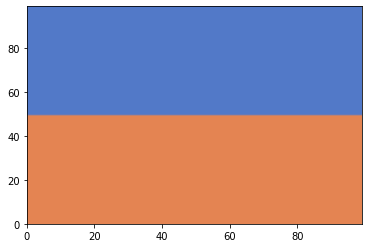

In [33]:
cmap = LinearSegmentedColormap.from_list("mycmap", col)
print(cmap(0))
x = np.arange(100)
y = np.arange(100)

z = np.zeros((100, 100))
print(z.shape)
z[:-50] = z[:-50] + 20

plt.contourf(x, y, z, cmap=cmap)